First few rows of the dataframe:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%      

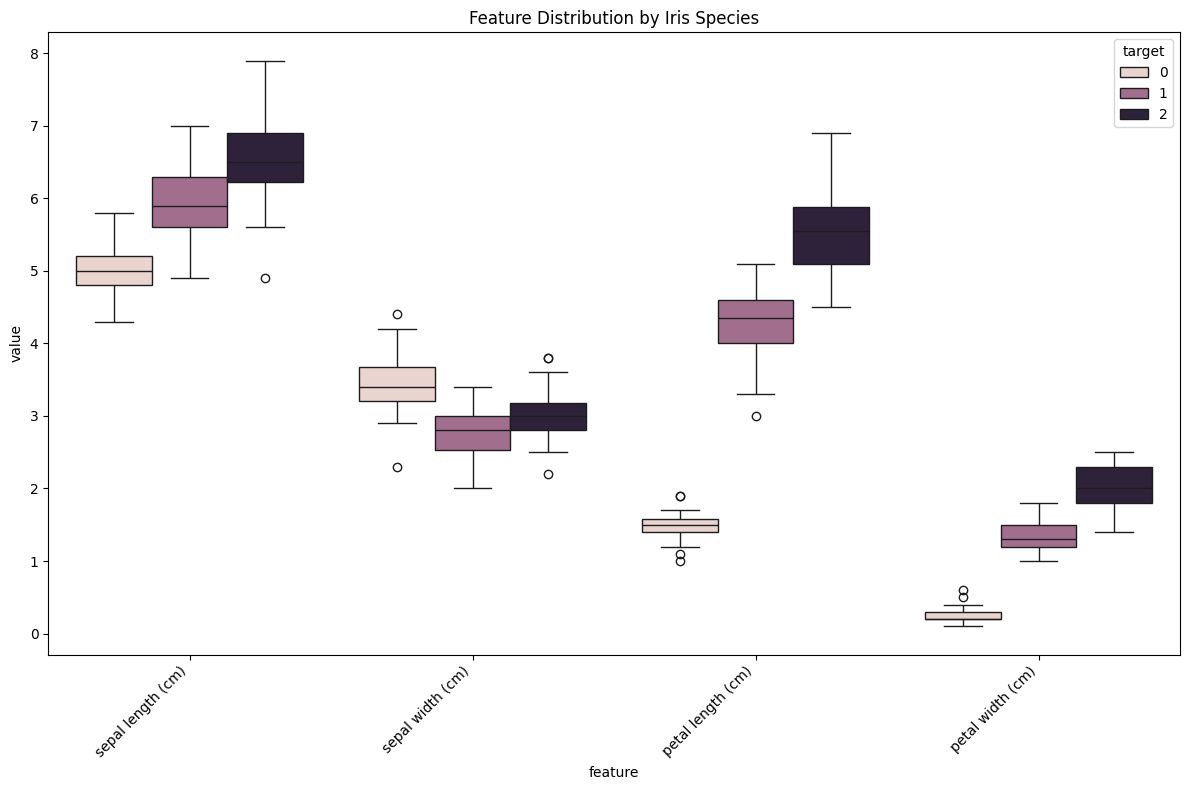

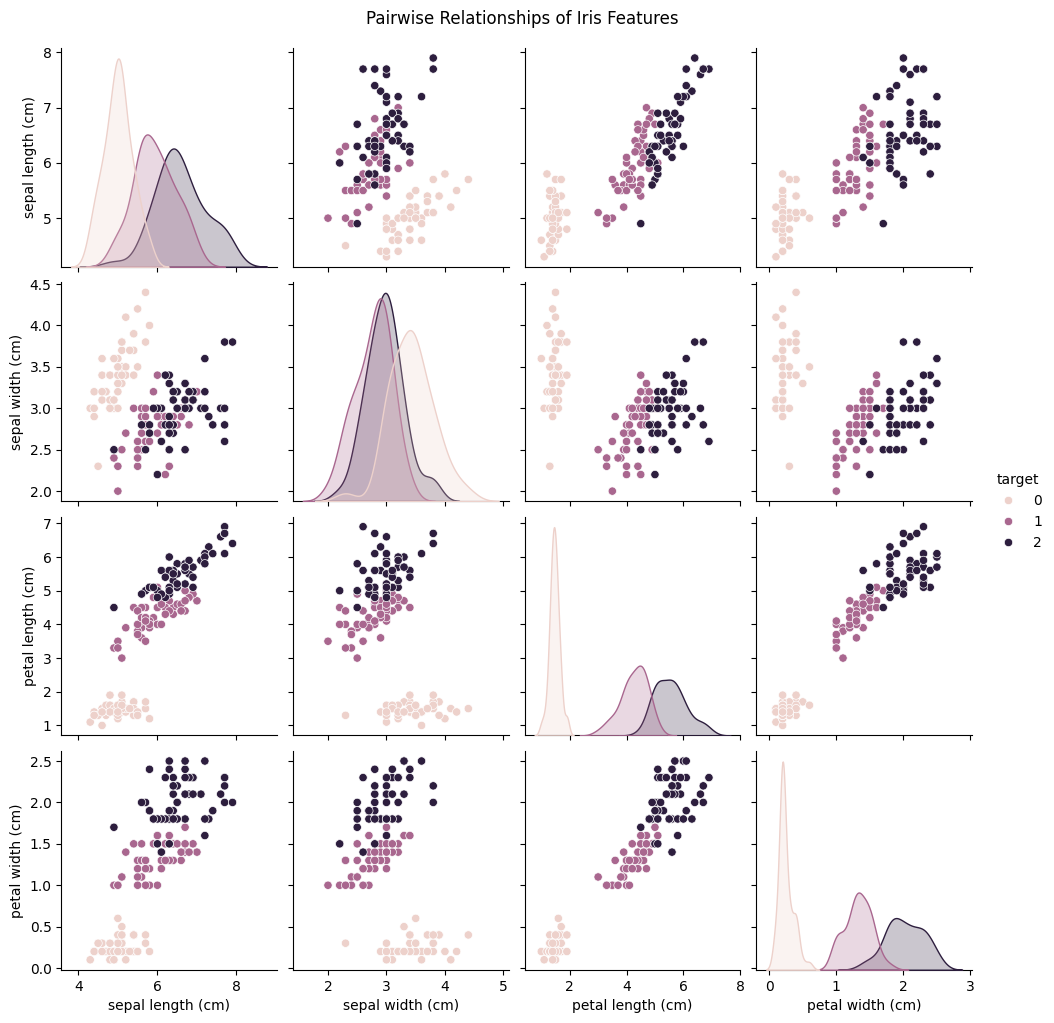

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Model Evaluation:
Accuracy: 0.9111

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.69      0.82        13
   virginica       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45



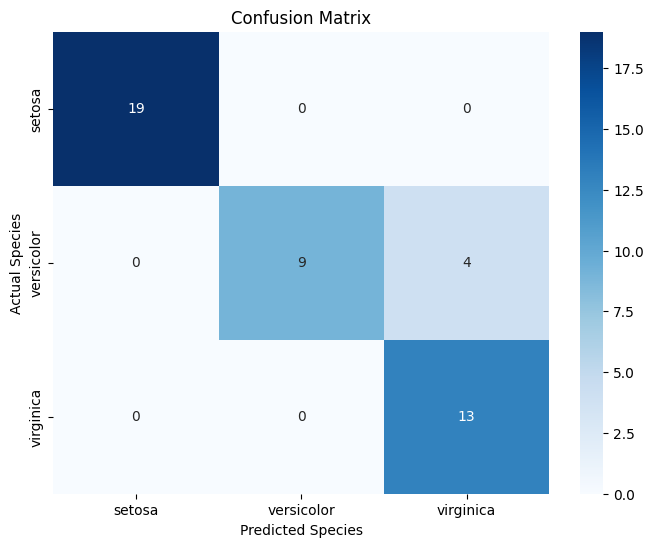


Feature Importance (based on Logistic Regression coefficients):
                     setosa  versicolor  virginica
petal length (cm)  1.532186    0.511270   1.720301
petal width (cm)   1.331674    0.682272   2.313889
sepal width (cm)   1.313562    1.364577   0.056050
sepal length (cm)  0.686637    0.128433   0.102522


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame

# Separate features (X) and target (y)
X = df[iris.feature_names]
y = df['target']
target_names = iris.target_names

# Exploratory Data Analysis (Optional but Recommended)
print("First few rows of the dataframe:")
print(df.head())

print("\nSummary statistics:")
print(df.describe())

print("\nClass distribution:")
print(y.value_counts())

# Visualize feature distributions by species
df_melted = pd.melt(df, id_vars='target', value_vars=iris.feature_names, var_name='feature', value_name='value')
plt.figure(figsize=(12, 8))
sns.boxplot(x='feature', y='value', hue='target', data=df_melted)
plt.title('Feature Distribution by Iris Species')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize pairwise relationships between features
sns.pairplot(df, hue='target')
plt.suptitle('Pairwise Relationships of Iris Features', y=1.02)
plt.show()

# Data Preprocessing: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Training (Logistic Regression as an example)
model = LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr') # 'ovr' handles multi-class
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

# Feature Importance (for Logistic Regression - magnitude of coefficients)
feature_importance = pd.DataFrame(abs(model.coef_.T), index=iris.feature_names, columns=target_names) # Use target_names as columns
feature_importance = feature_importance.sort_values(by=target_names[0], ascending=False) # Update the sorting column
print("\nFeature Importance (based on Logistic Regression coefficients):")
print(feature_importance)


--- Support Vector Machine (SVM) ---
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



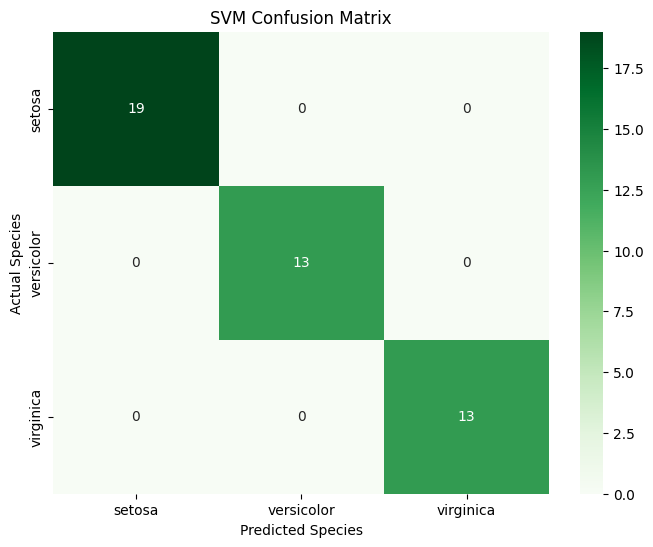

In [14]:
# --- Support Vector Machine (SVM) ---
svm_model = SVC(random_state=42, kernel='rbf', C=1.0)
svm_model.fit(X_train_scaled, y_train)
svm_y_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("\n--- Support Vector Machine (SVM) ---")
print(f"Accuracy: {svm_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, svm_y_pred, target_names=target_names))
cm_svm = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()


--- K-Nearest Neighbors (KNN) ---
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



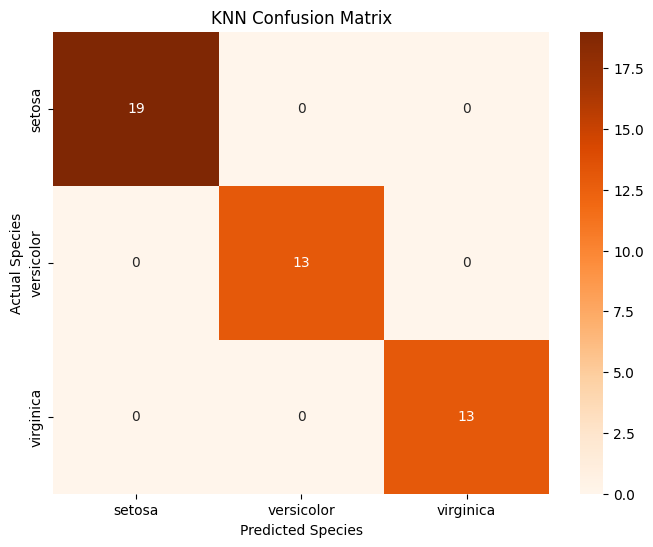

In [15]:
# --- K-Nearest Neighbors (KNN) ---
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_y_pred = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("\n--- K-Nearest Neighbors (KNN) ---")
print(f"Accuracy: {knn_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, knn_y_pred, target_names=target_names))
cm_knn = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges',
            xticklabels=target_names, yticklabels=target_names)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()


--- Random Forest ---
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



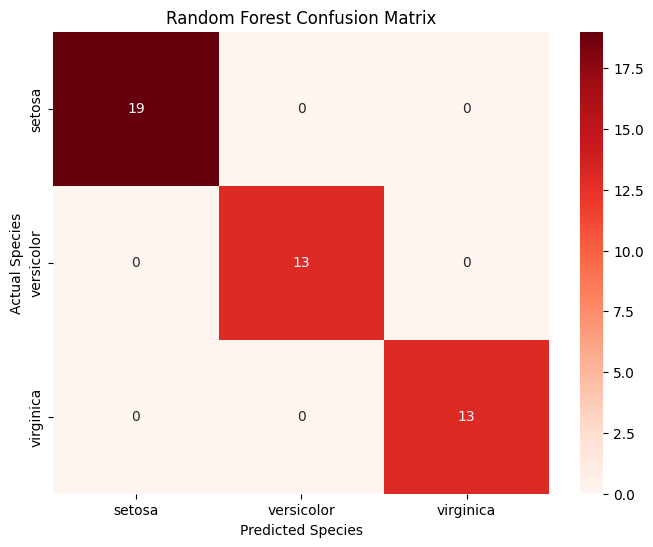


Feature Importance (Random Forest):
                   Importance
petal width (cm)     0.433982
petal length (cm)    0.417308
sepal length (cm)    0.104105
sepal width (cm)     0.044605


In [16]:
# --- Random Forest ---
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("\n--- Random Forest ---")
print(f"Accuracy: {rf_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, rf_y_pred, target_names=target_names))
cm_rf = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

# Feature Importance (for Random Forest)
feature_importance_rf = pd.DataFrame(rf_model.feature_importances_, index=iris.feature_names, columns=['Importance'])
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Random Forest):")
print(feature_importance_rf)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Multilayer Perceptron (MLP) ---
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



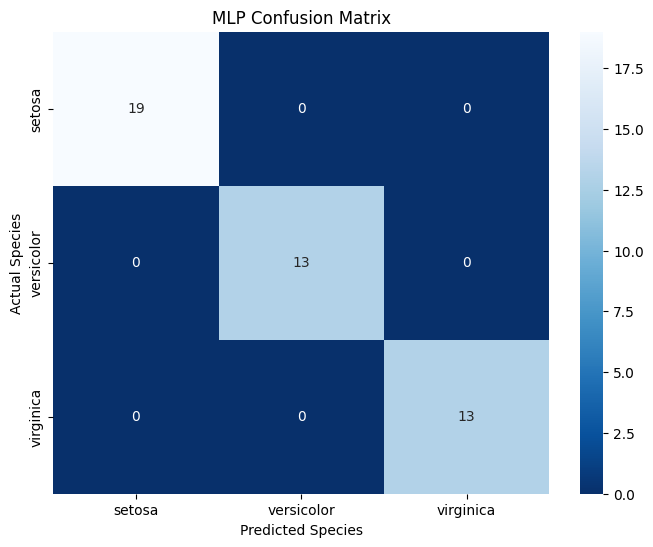

In [2]:
# --- Multilayer Perceptron (MLP) ---
mlp_model = MLPClassifier(random_state=42, hidden_layer_sizes=(10, 10), max_iter=300, solver='adam')
mlp_model.fit(X_train_scaled, y_train)
mlp_y_pred = mlp_model.predict(X_test_scaled)
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
print("\n--- Multilayer Perceptron (MLP) ---")
print(f"Accuracy: {mlp_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, mlp_y_pred, target_names=target_names))
cm_mlp = confusion_matrix(y_test, mlp_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues_r',
            xticklabels=target_names, yticklabels=target_names)
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()